In [182]:
!pip install pandas scikit-learn xgboost seaborn

In [183]:
import boto3
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [184]:
# Initialize a boto3 client with your AWS credentials
# Access key ID & Secret access key shared in your mail
s3_client = boto3.client(
    's3',
    aws_access_key_id='',
    aws_secret_access_key=''
)

### Read  CSV file from S3
# Specify your  AWS S3 bucket  name
bucket_name = 'datathon-3.0'
read_file_name = 'Q2-new-products.csv'

# Get the object from the bucket
response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)

# Read the object (which is in bytes) into a DataFrame
with open(read_file_name, 'wb') as fp:
    fp.write(BytesIO(response['Body'].read()).getbuffer())

df = pd.read_csv(read_file_name)
df.head()


,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [185]:
product_df = pd.read_csv('TBL_PRODUCT_CATALOGUE.csv')
product_df['UNIT_PRICE'] = product_df['PACK_PRICE'] / product_df['DATA_VOL_GB']
product_df.head()

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250
1,2,Standard,Cash,328,30,24.0,Continue,13.666667
2,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333
3,4,Premium,Cash,558,15,64.0,Discontinue,8.718750
4,5,Premium,Cash,300,7,20.0,New,15.000000


In [186]:
purchase_df = pd.read_csv('TBL_PACK_PURCHASE.csv')
purchase_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS
0,20190703,CD20EDFC8000A7,1756,1
1,20190522,CD1F932E0A89C1,1524,1
2,20190522,CD201715F62164,1524,1
3,20190623,CD1F7B4DD83C5B,1524,1
4,20190523,CD1F7BD12742B8,1524,1


In [187]:
consumption_df = pd.read_csv('TBL_DATA_CONSUMPTION.csv')
print(len(consumption_df))
consumption_df.head()

23375373


,EVENT_DATE,CUSTOMER_ID,TOTAL_VOLUME_GB,VOLUME_GB_IN_HIGH_BANDWIDTH
0,20190914,CD1F7653F6BE80,14.2695,14.2695
1,20190916,CD1F7653F6BE80,22.2891,22.2891
2,20190716,CD1F7653F6BE80,26.3086,26.3086
3,20190906,CD1F7653F6BE80,6.8477,6.7813
4,20190921,CD1F7653F6BE80,15.1406,15.1406


In [188]:
test_df = pd.read_csv('Q2-new-products.csv')
test_df.head()

,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [189]:
purchase_product_df = pd.merge(purchase_df, product_df, how='inner', on='PACK_ID')
purchase_product_df['EVENT_DATE'] = pd.to_datetime(purchase_product_df['EVENT_DATE'], format='%Y%m%d')
purchase_product_df.sort_values(by='EVENT_DATE', inplace=True, ignore_index=True)
purchase_product_df['TOTAL_DATA_VOL_GB'] = purchase_product_df['DATA_VOL_GB'] * purchase_product_df['HITS']
purchase_product_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB
0,2019-05-21,CD218554C71203,278,1,Premium,Cash,356,7,56.0,Discontinue,6.357143,56.0
1,2019-05-21,CD20F0D0031916,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
2,2019-05-21,CD20F3F3132F06,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
3,2019-05-21,CD212DD33D5C02,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
4,2019-05-21,CD212DD6E5B84B,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0


In [190]:
purchase_product_df['PRODUCT_STATUS'].value_counts()

PRODUCT_STATUS
Discontinue    1084280
Continue        124430
Name: count, dtype: int64

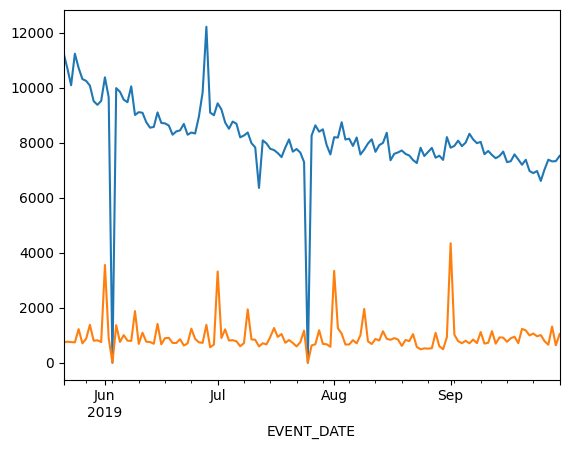

In [191]:
discontinued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Discontinue']
continued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Continue']
daily_hits_discontinued = discontinued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_continued = continued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_discontinued.plot()
daily_hits_continued.plot()
plt.show()

In [192]:
purchase_product_df_filtered = pd.merge(test_df, purchase_product_df, how='inner', on='PACK_ID')
purchase_product_df_filtered

,PACK_ID,EVENT_DATE,CUSTOMER_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB


In [193]:
test_product_df = pd.merge(test_df, product_df, how='inner', on='PACK_ID')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [194]:
latest_date_of_purchase = purchase_product_df.iloc[-1]['EVENT_DATE']
latest_date_of_purchase

Timestamp('2019-09-30 00:00:00')

In [195]:
purchase_product_df['CUSTOMER_ID'].nunique()

342635

In [196]:
purchase_product_df['SERVICE_TYPE'].value_counts()

SERVICE_TYPE
Premium     954953
Standard    253757
Name: count, dtype: int64

In [197]:
purchase_product_df_filtered = purchase_product_df[purchase_product_df['EVENT_DATE'] >= '2019-06-01']
purchase_product_df_filtered

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB
122168,2019-06-01,CD1F7EAD621D6C,1330,1,Standard,Digital Wallets,994,30,168.0,Discontinue,5.916667,168.0
122169,2019-06-01,CD20FB9FF49100,812,1,Premium,Cash,296,7,24.0,Discontinue,12.333333,24.0
122170,2019-06-01,CD214ADD83CFA9,622,1,Premium,Credit Card,110,30,4.0,Discontinue,27.500000,4.0
122171,2019-06-01,CD211EBE8FE0DD,1181,1,Premium,Cash,994,30,100.0,Discontinue,9.940000,100.0
122172,2019-06-01,CD20EE296E0002,2047,1,Premium,Cash,120,30,4.0,Continue,30.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1208705,2019-09-30,CD218220F4F1FA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208706,2019-09-30,CD216AE5C12541,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208707,2019-09-30,CD212E0040B457,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208708,2019-09-30,CD212FA9BD7AFA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0


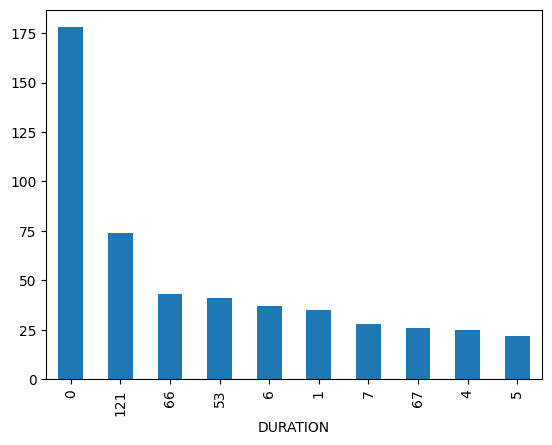

In [198]:
purchase_product_df_discontinued = purchase_product_df_filtered[purchase_product_df_filtered['PRODUCT_STATUS'] == 'Discontinue']
purchase_product_df_last_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='last')
purchase_product_df_first_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='first')
purchase_product_df_dates = pd.merge(purchase_product_df_first_dates, purchase_product_df_last_dates, on='PACK_ID', how='inner')
purchase_product_df_dates = purchase_product_df_dates[['PACK_ID', 'EVENT_DATE_x', 'EVENT_DATE_y']].rename(columns={'EVENT_DATE_x': 'START_DATE', 'EVENT_DATE_y': 'LAST_DATE'})
purchase_product_df_dates['DURATION'] = (purchase_product_df_dates['LAST_DATE'] - purchase_product_df_dates['START_DATE']).dt.days
purchase_product_df_dates['DURATION'].value_counts()[:10].plot(kind='bar')
plt.show()

In [199]:
purchase_product_df_offer = purchase_product_df[purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_not_offer = purchase_product_df[~purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,TOTAL_DATA_VOL_GB
count,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000
mean,0.3f,1035.670,1.043,437.188,19.135,52.431,47.211,56.787
min,0.3f,15.000,1.000,110.000,3.000,0.200,2.281,0.200
25%,0.3f,492.000,1.000,200.000,7.000,12.000,4.938,12.000
50%,0.3f,1095.000,1.000,328.000,30.000,36.000,7.478,36.000
75%,0.3f,1497.000,1.000,672.000,30.000,64.000,22.000,64.000
max,0.3f,2059.000,2.000,3064.000,30.000,440.000,4970.000,880.000
std,nan,607.113,0.203,351.621,12.232,60.544,257.655,79.303


In [200]:
purchase_product_df_not_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,TOTAL_DATA_VOL_GB
count,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000
mean,0.3f,1024.542,1.004,422.142,14.132,54.923,18.066,55.022
min,0.3f,1.000,1.000,100.000,3.000,0.200,0.500,0.200
25%,0.3f,425.000,1.000,178.000,3.000,16.000,6.000,16.000
50%,0.3f,923.000,1.000,296.000,7.000,32.000,8.708,32.000
75%,0.3f,1671.000,1.000,558.000,30.000,80.000,13.600,80.000
max,0.3f,2057.000,13.000,6926.000,30.000,400.000,4980.000,1440.000
std,nan,646.206,0.073,351.503,11.924,56.348,131.793,56.603


In [201]:
purchase_product_df['DATA_VOL_GB'].nunique()

142

In [202]:
monthly_hits = purchase_product_df.groupby(['PACK_ID', purchase_product_df['EVENT_DATE'].dt.to_period('M')])['HITS'].sum().reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-08,18
1,1,2019-09,8
2,2,2019-05,12
3,2,2019-06,22
4,2,2019-07,23
...,...,...,...
3788,2054,2019-08,2
3789,2055,2019-08,15
3790,2056,2019-09,11
3791,2057,2019-09,5


In [203]:
date_range = pd.period_range(start='2019-06', end='2019-09', freq='M')
all_combinations = pd.MultiIndex.from_product([product_df['PACK_ID'].unique(), date_range], names=['PACK_ID', 'EVENT_DATE'])
all_combinations

MultiIndex([(   1, '2019-06'),
            (   1, '2019-07'),
            (   1, '2019-08'),
            (   1, '2019-09'),
            (   2, '2019-06'),
            (   2, '2019-07'),
            (   2, '2019-08'),
            (   2, '2019-09'),
            (   3, '2019-06'),
            (   3, '2019-07'),
            ...
            (2057, '2019-08'),
            (2057, '2019-09'),
            (2058, '2019-06'),
            (2058, '2019-07'),
            (2058, '2019-08'),
            (2058, '2019-09'),
            (2059, '2019-06'),
            (2059, '2019-07'),
            (2059, '2019-08'),
            (2059, '2019-09')],
           names=['PACK_ID', 'EVENT_DATE'], length=8196)

In [204]:
monthly_hits = monthly_hits.set_index(['PACK_ID', 'EVENT_DATE']).reindex(all_combinations, fill_value=0).reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-06,0
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
4,2,2019-06,22
...,...,...,...
8191,2058,2019-09,0
8192,2059,2019-06,0
8193,2059,2019-07,1
8194,2059,2019-08,0


In [205]:
test_product_df = pd.merge(test_df, product_df, on='PACK_ID', how='inner')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [206]:
def mean_ignoring_initial_zeroes(data):
    # Convert data series to numpy array for easier manipulation
    values = data.to_numpy()
    # Find the first index where value is not zero using np.nonzero (returns a tuple hence [0][0])
    first_non_zero_index = np.nonzero(values)[0][0] if np.any(values != 0) else None
    # If there are non-zero values, calculate the mean from the first non-zero value onward
    if first_non_zero_index is not None:
        return values[first_non_zero_index:].mean()
    else:
        # Return NaN or 0 if all values are zero
        return 0


# HYPERPARAMETER BELOW

In [207]:
monthly_hits_discontinued = monthly_hits[monthly_hits['PACK_ID'].isin(product_df[product_df['PRODUCT_STATUS'] == 'Discontinue']['PACK_ID'])].reset_index(drop=True)
monthly_hits_discontinued = monthly_hits_discontinued[monthly_hits_discontinued['EVENT_DATE'].dt.month > 5]
monthly_hits_discontinued

,PACK_ID,EVENT_DATE,HITS
0,1,2019-06,0
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
4,3,2019-06,429
...,...,...,...
5251,2057,2019-09,5
5252,2059,2019-06,0
5253,2059,2019-07,1
5254,2059,2019-08,0


In [208]:
product_means = monthly_hits_discontinued.groupby('PACK_ID')['HITS'].apply(mean_ignoring_initial_zeroes).reset_index(name='HITS_MEAN')
product_means

,PACK_ID,HITS_MEAN
0,1,13.000000
1,3,262.750000
2,4,1733.500000
3,6,810.000000
4,7,397.000000
...,...,...
1309,2054,2.000000
1310,2055,7.500000
1311,2056,11.000000
1312,2057,5.000000


In [209]:
product_df_aug = pd.merge(product_df, product_means, on='PACK_ID', how='inner')
product_df_aug

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,HITS_MEAN
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250,13.000000
1,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333,262.750000
2,4,Premium,Cash,558,15,64.0,Discontinue,8.718750,1733.500000
3,6,Premium,Mobile Walet,196,3,28.0,Discontinue,7.000000,810.000000
4,7,Premium,Mobile Walet,898,30,44.0,Discontinue,20.409091,397.000000
...,...,...,...,...,...,...,...,...,...
1309,2054,Premium,Digital Wallets,258,7,40.0,Discontinue,6.450000,2.000000
1310,2055,Premium,Digital Wallets,180,7,68.0,Discontinue,2.647059,7.500000
1311,2056,Standard,Digital Wallets,178,3,52.0,Discontinue,3.423077,11.000000
1312,2057,Premium,Mobile Walet,996,30,176.0,Discontinue,5.659091,5.000000


In [210]:
product_df_aug['UNIT_PRICE'].value_counts()

UNIT_PRICE
5.000000     21
6.000000     15
4.500000     10
6.980000      9
4.000000      9
             ..
4.880000      1
35.000000     1
48.292683     1
8.900000      1
4.118750      1
Name: count, Length: 672, dtype: int64

In [211]:
product_df_aug

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,HITS_MEAN
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250,13.000000
1,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333,262.750000
2,4,Premium,Cash,558,15,64.0,Discontinue,8.718750,1733.500000
3,6,Premium,Mobile Walet,196,3,28.0,Discontinue,7.000000,810.000000
4,7,Premium,Mobile Walet,898,30,44.0,Discontinue,20.409091,397.000000
...,...,...,...,...,...,...,...,...,...
1309,2054,Premium,Digital Wallets,258,7,40.0,Discontinue,6.450000,2.000000
1310,2055,Premium,Digital Wallets,180,7,68.0,Discontinue,2.647059,7.500000
1311,2056,Standard,Digital Wallets,178,3,52.0,Discontinue,3.423077,11.000000
1312,2057,Premium,Mobile Walet,996,30,176.0,Discontinue,5.659091,5.000000


In [212]:
test_product_df[~test_product_df['UNIT_PRICE'].isin(product_df_aug['UNIT_PRICE'])]

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
10,1424,Standard,Credit Card,394,30,60.0,New,6.566667
11,1587,Premium,Digital Wallets,996,30,88.0,New,11.318182
12,1576,Standard,Mobile Walet,178,7,14.0,New,12.714286
13,90,Standard,Mobile Walet,356,7,44.0,New,8.090909


In [213]:
comparison = pd.merge(product_df_aug, test_product_df, on='PACK_PRICE', how='inner')[['PACK_PRICE', 'VALIDITY_x', 'DATA_VOL_GB_x', 'UNIT_PRICE_x', 'VALIDITY_y', 'DATA_VOL_GB_y', 'UNIT_PRICE_y']]
comparison.head(20)

,PACK_PRICE,VALIDITY_x,DATA_VOL_GB_x,UNIT_PRICE_x,VALIDITY_y,DATA_VOL_GB_y,UNIT_PRICE_y
0,196,3,28.0,7.000000,7,12.0,16.333333
1,196,3,28.0,7.000000,7,10.0,19.600000
2,136,3,16.0,8.500000,7,8.0,17.000000
3,136,3,16.0,8.500000,7,8.0,17.000000
4,136,3,14.0,9.714286,7,8.0,17.000000
5,136,3,14.0,9.714286,7,8.0,17.000000
6,196,3,44.0,4.454545,7,12.0,16.333333
7,196,3,44.0,4.454545,7,10.0,19.600000
8,136,3,12.0,11.333333,7,8.0,17.000000
9,136,3,12.0,11.333333,7,8.0,17.000000


In [214]:
product_df_aug.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,HITS_MEAN
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1038.614916,498.922374,18.720700,67.810594,29.206608,239.651256
std,590.781090,432.004571,11.770091,70.649980,207.533989,943.088551
min,1.000000,100.000000,3.000000,0.200000,2.281250,0.000000
25%,531.500000,200.000000,7.000000,20.000000,5.273352,2.500000
50%,1053.000000,356.000000,30.000000,40.000000,7.333333,22.125000
75%,1548.750000,698.000000,30.000000,92.000000,12.900000,136.750000
max,2059.000000,6926.000000,30.000000,440.000000,4980.000000,13760.000000


In [215]:
test_product_df.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE
count,20.00000,20.000000,20.000000,20.00000,20.000000
mean,888.70000,535.100000,15.050000,66.20000,10.587632
std,714.60413,416.885432,11.255291,61.74617,4.404658
min,29.00000,136.000000,7.000000,8.00000,4.950000
25%,171.75000,196.000000,7.000000,18.50000,7.247917
50%,672.50000,375.000000,7.000000,48.00000,9.700000
75%,1578.75000,996.000000,30.000000,82.00000,13.235714
max,1856.00000,1396.000000,30.000000,220.00000,19.600000


In [216]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [217]:
label_encoders = {}
for column in ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']:
    le = LabelEncoder()
    product_df_aug[column] = le.fit_transform(product_df_aug[column])
    label_encoders[column] = le

product_df_aug['UNIT_PRICE'] = product_df_aug['UNIT_PRICE'].astype(float)

In [218]:
X = product_df_aug.drop(['HITS_MEAN', 'PACK_ID', 'PRODUCT_STATUS'], axis=1)
y = product_df_aug['HITS_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [219]:
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [220]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1119288.1584220594
R² Score: 0.13700048644473872


In [221]:
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 1057.9641574373204


In [222]:
for column in ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']:
    test_product_df[column] = label_encoders[column].transform(test_product_df[column])

# Ensure UNIT_PRICE is treated as a float (if not already)
test_product_df['UNIT_PRICE'] = test_product_df['UNIT_PRICE'].astype(float)

# Prepare features
X_new_test = test_product_df.drop(['PACK_ID', 'PRODUCT_STATUS'], axis=1)  # Assuming 'HITS_MEAN' should be dropped as it's the target

# Predict using the random forest regressor
y_new_pred = rf_regressor.predict(X_new_test)

# Optionally, you can add predictions back to the test dataframe
test_product_df['Predicted_HITS_MEAN'] = y_new_pred

print(test_product_df[['Predicted_HITS_MEAN']])

    Predicted_HITS_MEAN
0            988.566000
1            501.486917
2            684.005583
3           2293.304250
4           1622.202750
5            715.994333
6            735.403083
7           1314.939167
8            631.377500
9            332.766583
10           350.511167
11           719.067250
12           367.267750
13           993.804833
14           116.627750
15           300.748333
16           277.174833
17           140.350500
18          1004.660500
19           158.992167


In [223]:
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,Predicted_HITS_MEAN
0,352,0,3,94,1,62,New,7.615385,988.566000
1,1735,0,2,94,1,73,New,5.500000,501.486917
2,179,0,3,74,1,46,New,10.500000,684.005583
3,1434,0,3,12,1,18,New,17.000000,2293.304250
4,426,0,3,65,1,34,New,14.800000,1622.202750
5,77,0,3,32,1,22,New,16.333333,715.994333
6,1856,0,3,32,1,21,New,19.600000,735.403083
7,150,0,3,198,3,109,New,7.868421,1314.939167
8,1563,0,3,185,3,77,New,12.450000,631.377500
9,801,0,2,198,3,111,New,7.475000,332.766583


In [224]:
# Round the predictions to the nearest integer and rename the column
test_product_df['HITS'] = test_product_df['Predicted_HITS_MEAN'].round().astype(int)

# Keep only the 'PACK_ID' and the newly created 'HITS' columns
final_df = test_product_df[['PACK_ID', 'HITS']]

print(final_df.head())  # To verify the contents before exporting


   PACK_ID  HITS
0      352   989
1     1735   501
2      179   684
3     1434  2293
4      426  1622


In [225]:
# Export to CSV
final_df.to_csv('Q2-submission.csv', index=False)

In [226]:
import xgboost as xgb

# Configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, seed=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [227]:
# Predict HITS_MEAN using the trained XGBoost regressor
y_new_pred_xgb = xgb_regressor.predict(X_new_test)

# Add predictions to test_product_df and round them to the nearest integer
test_product_df['Predicted_HITS_MEAN_XGB'] = y_new_pred_xgb
test_product_df['HITS_XGB'] = test_product_df['Predicted_HITS_MEAN_XGB'].round().astype(int)


In [228]:
# Keep only the 'PACK_ID' and the newly created 'HITS_XGB' columns
final_xgb_df = test_product_df[['PACK_ID', 'HITS_XGB']]
final_xgb_df.rename(columns={'HITS_XGB': 'HITS'}, inplace=True)

# Print to verify
print(final_xgb_df.head())

# Export to CSV
final_xgb_df.to_csv('predicted_hits_xgb.csv', index=False)


   PACK_ID  HITS
0      352  1016
1     1735   766
2      179   312
3     1434  2356
4      426   936


/tmp/ipykernel_29732/1083743645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_xgb_df.rename(columns={'HITS_XGB': 'HITS'}, inplace=True)


In [49]:
correlation_matrix = product_df_aug.drop(['HITS_MEAN', 'PACK_ID', 'PRODUCT_STATUS'], axis=1).corr()

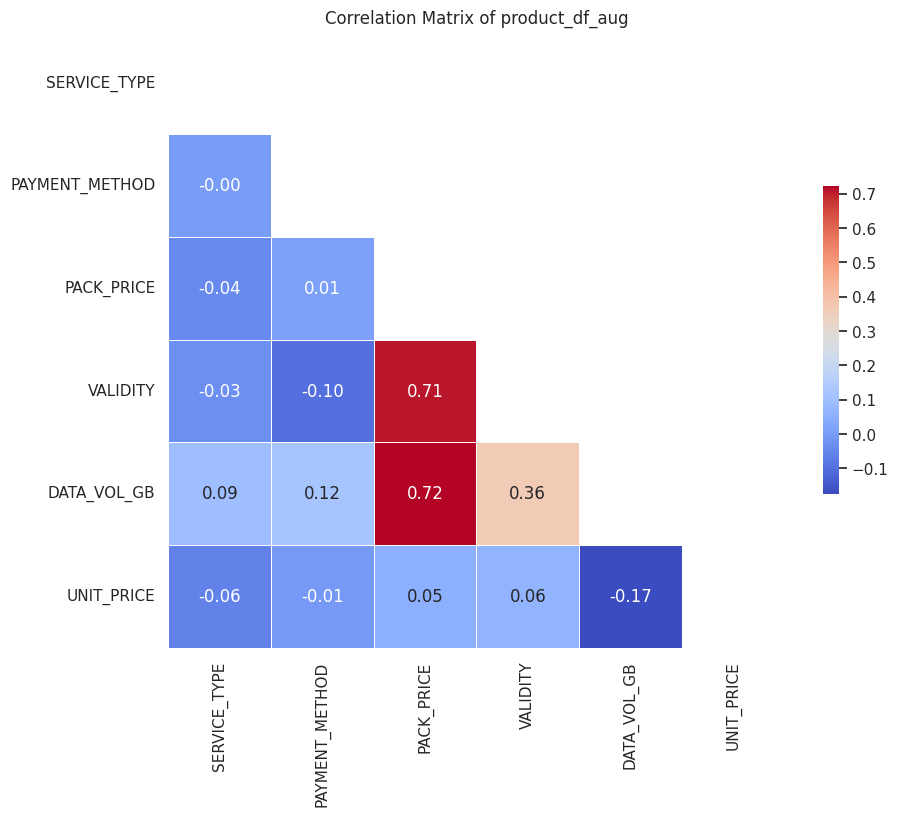

In [175]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of product_df_aug')
plt.show()


In [197]:
product_df_continued = product_df[product_df['PRODUCT_STATUS'] == 'Continue']
product_df_continued

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
1,2,Standard,Cash,328,30,24.0,Continue,13.666667
25,27,Premium,Cash,320,30,12.0,Continue,26.666667
32,34,Premium,Cash,596,30,28.0,Continue,21.285714
44,46,Standard,Cash,1396,30,260.0,Continue,5.369231
52,54,Premium,Cash,110,30,4.0,Continue,27.500000
...,...,...,...,...,...,...,...,...
2013,2024,Premium,Cash,532,30,20.0,Continue,26.600000
2029,2040,Premium,Cash,1598,30,48.0,Continue,33.291667
2030,2041,Premium,Cash,300,30,40.0,Continue,7.500000
2033,2044,Premium,Cash,416,30,8.0,Continue,52.000000


In [238]:
# Specify the categorical columns
categorical_columns = ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']

# Combine the categorical parts of both dataframes to ensure consistent encoding
combined_categorical = pd.concat([product_df_continued[categorical_columns], test_product_df[categorical_columns]], ignore_index=True)

# One-hot encode the combined dataframe
combined_encoded = pd.get_dummies(combined_categorical)

# Split the encoded data back into two separate DataFrames
encoded_continued = combined_encoded.iloc[:len(product_df_continued)]
encoded_test = combined_encoded.iloc[len(product_df_continued):]

In [239]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(encoded_test, encoded_continued)

# similarity_matrix[i, j] will be the cosine similarity between the ith pack in test_product_df
# and the jth pack in product_df_continued

In [240]:
import numpy as np

# Get the index of the max similarity for each test product
most_similar_indices = np.argmax(similarity_matrix, axis=1)

# Map indices to PACK_ID from product_df_continued
most_similar_pack_ids = product_df_continued['PACK_ID'].iloc[most_similar_indices].values

# Create a DataFrame to show the test_product_df PACK_ID with its most similar PACK_ID from product_df_continued
result_df = pd.DataFrame({
    'Test_PACK_ID': test_product_df['PACK_ID'].values,
    'Most_Similar_PACK_ID': most_similar_pack_ids
})

result_df

,Test_PACK_ID,Most_Similar_PACK_ID
0,352,771
1,1735,771
2,179,771
3,1434,1469
4,426,771
5,77,771
6,1856,771
7,150,771
8,1563,771
9,801,771


In [242]:
# We already have most_similar_indices and categorical_columns from previous steps
# categorical_columns = ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']

# Extract these features for the most similar PACK_IDs from product_df_continued
similar_pack_features = product_df_continued[categorical_columns].iloc[most_similar_indices].reset_index(drop=True)
similar_pack_features.columns = ['Similar_' + col for col in categorical_columns]  # Prefix with 'Similar_'

# Extract these features for each PACK_ID in test_product_df
test_pack_features = test_product_df[categorical_columns].reset_index(drop=True)
test_pack_features.columns = ['Test_' + col for col in categorical_columns]  # Prefix with 'Test_'

# You already have the result_df from previous steps with 'Test_PACK_ID' and 'Most_Similar_PACK_ID'
# Concatenate the feature dataframes to the result dataframe
result_df = pd.concat([result_df, test_pack_features, similar_pack_features], axis=1)
result_df

,Test_PACK_ID,Most_Similar_PACK_ID,Test_SERVICE_TYPE,Test_PAYMENT_METHOD,Test_PACK_PRICE,Test_VALIDITY,Test_DATA_VOL_GB,Similar_SERVICE_TYPE,Similar_PAYMENT_METHOD,Similar_PACK_PRICE,Similar_VALIDITY,Similar_DATA_VOL_GB
0,352,771,0,3,94,1,62,Premium,Digital Wallets,1596,30,400.0
1,1735,771,0,2,94,1,73,Premium,Digital Wallets,1596,30,400.0
2,179,771,0,3,74,1,46,Premium,Digital Wallets,1596,30,400.0
3,1434,1469,0,3,12,1,18,Premium,Cash,200,30,400.0
4,426,771,0,3,65,1,34,Premium,Digital Wallets,1596,30,400.0
5,77,771,0,3,32,1,22,Premium,Digital Wallets,1596,30,400.0
6,1856,771,0,3,32,1,21,Premium,Digital Wallets,1596,30,400.0
7,150,771,0,3,198,3,109,Premium,Digital Wallets,1596,30,400.0
8,1563,771,0,3,185,3,77,Premium,Digital Wallets,1596,30,400.0
9,801,771,0,2,198,3,111,Premium,Digital Wallets,1596,30,400.0


In [243]:
# Extract relevant features
continuous_columns = ['PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']
continued_features = product_df_continued[['PACK_ID'] + continuous_columns]
test_features = test_product_df[['PACK_ID'] + continuous_columns]

In [244]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit on combined data to prevent data leakage and ensure fairness in scaling
combined_features = pd.concat([continued_features[continuous_columns], test_features[continuous_columns]], ignore_index=True)
scaler.fit(combined_features)

# Transform the features
continued_features[continuous_columns] = scaler.transform(continued_features[continuous_columns])
test_features[continuous_columns] = scaler.transform(test_features[continuous_columns])


/tmp/ipykernel_9158/2119881772.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continued_features[continuous_columns] = scaler.transform(continued_features[continuous_columns])
/tmp/ipykernel_9158/2119881772.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[continuous_columns] = scaler.transform(test_features[continuous_columns])


In [245]:
from scipy.spatial.distance import cdist

# Calculate Euclidean distances
distance_matrix = cdist(test_features[continuous_columns], continued_features[continuous_columns], metric='euclidean')

# distance_matrix[i, j] will be the Euclidean distance between the ith pack in test_product_df
# and the jth pack in product_df_continued


In [246]:
import numpy as np

# Get the index of the minimum distance for each test product
closest_indices = np.argmin(distance_matrix, axis=1)

# Map indices to PACK_ID from product_df_continued
closest_pack_ids = continued_features['PACK_ID'].iloc[closest_indices].values

# Create a DataFrame to show the test_product_df PACK_ID with its closest PACK_ID from product_df_continued
closest_df = pd.DataFrame({
    'Test_PACK_ID': test_features['PACK_ID'].values,
    'Closest_PACK_ID': closest_pack_ids
})


In [247]:
closest_df

,Test_PACK_ID,Closest_PACK_ID
0,352,1951
1,1735,1951
2,179,851
3,1434,851
4,426,851
5,77,851
6,1856,851
7,150,477
8,1563,1951
9,801,477


In [253]:
# Extract these features for the closest PACK_IDs from product_df_continued
closest_pack_features = product_df_continued[['PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']].iloc[closest_indices].reset_index(drop=True)
closest_pack_features.columns = ['Closest_PACK_PRICE', 'Closest_VALIDITY', 'Closest_DATA_VOL_GB']  # Rename columns for clarity

# Extract these features for each PACK_ID in test_product_df
test_pack_features = test_product_df[['PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']].reset_index(drop=True)
test_pack_features.columns = ['Test_PACK_PRICE', 'Test_VALIDITY', 'Test_DATA_VOL_GB']  # Rename columns for clarity


In [254]:
# Concatenate the feature dataframes to the result dataframe
closest_df = pd.concat([closest_df, test_pack_features, closest_pack_features], axis=1)


In [255]:
closest_df

,Test_PACK_ID,Closest_PACK_ID,Test_PACK_PRICE,Test_VALIDITY,Test_DATA_VOL_GB,Closest_PACK_PRICE,Closest_VALIDITY,Closest_DATA_VOL_GB,Test_PACK_PRICE,Test_VALIDITY,Test_DATA_VOL_GB,Closest_PACK_PRICE,Closest_VALIDITY,Closest_DATA_VOL_GB
0,352,1951,94,1,62,296,7,60.0,396,7,52.0,296,7,60.0
1,1735,1951,94,1,73,296,7,60.0,396,7,72.0,296,7,60.0
2,179,851,74,1,46,178,7,28.0,336,7,32.0,178,7,28.0
3,1434,851,12,1,18,178,7,28.0,136,7,8.0,178,7,28.0
4,426,851,65,1,34,178,7,28.0,296,7,20.0,178,7,28.0
5,77,851,32,1,22,178,7,28.0,196,7,12.0,178,7,28.0
6,1856,851,32,1,21,178,7,28.0,196,7,10.0,178,7,28.0
7,150,477,198,3,109,356,7,64.0,1196,30,152.0,356,7,64.0
8,1563,1951,185,3,77,296,7,60.0,996,30,80.0,296,7,60.0
9,801,477,198,3,111,356,7,64.0,1196,30,160.0,356,7,64.0


In [251]:
product_df['VALIDITY'].unique()

array([30,  3, 15,  7])